In [1]:
!pip install yfinance 

In [2]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

%matplotlib inline

In [3]:
data = yf.download("GOLD" 
                   , start="2018-01-01", end="2022-10-26")

[*********************100%***********************]  1 of 1 completed


In [4]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

,Close
Date,
2022-10-19,14.45
2022-10-20,14.51
2022-10-21,15.01
2022-10-24,15.05
2022-10-25,15.26


In [5]:
data_df.isna().sum()

Close    0
dtype: int64

In [6]:
daily_change = data_df.pct_change()
daily_change.tail()

,Close
Date,
2022-10-19,-0.022989
2022-10-20,0.004152
2022-10-21,0.034459
2022-10-24,0.002665
2022-10-25,0.013953


<AxesSubplot:xlabel='Date'>

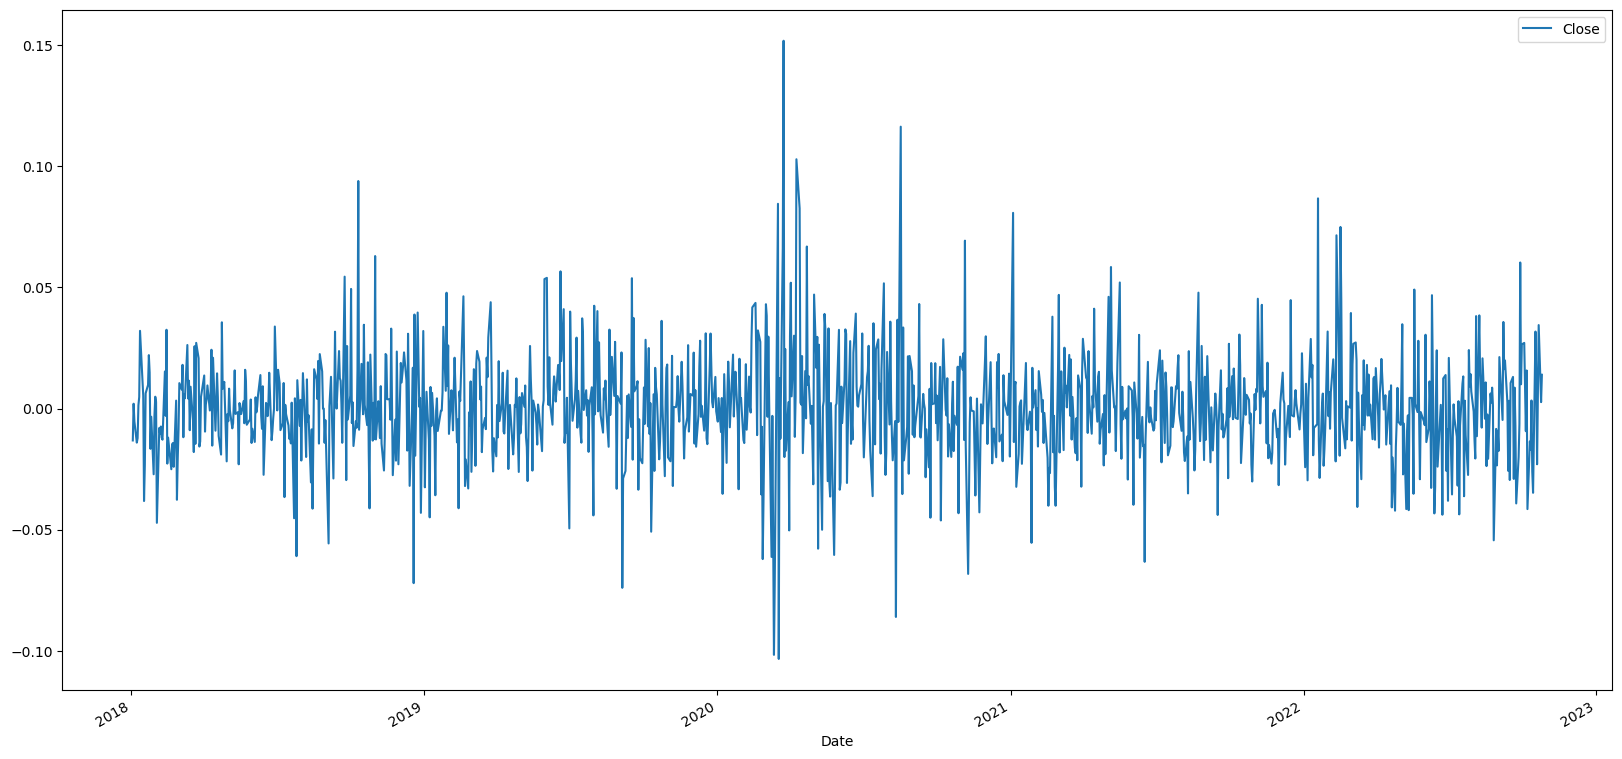

In [7]:
daily_change.plot(figsize=(20,10))

In [10]:
daily_change.describe()

,Close
count,1212.000000
mean,0.000259
std,0.022663
min,-0.103331
25%,-0.012002
50%,0.000209
75%,0.011700
max,0.151802


In [11]:
average = daily_change.mean()
average = average.sort_values()
average

Close    0.000259
dtype: float64

In [12]:
std = daily_change.std()
std = std.sort_values()
std

Close    0.022663
dtype: float64

In [13]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,0.986842
2018-01-04,0.988816
2018-01-05,0.983553
2018-01-08,0.969737


<AxesSubplot:xlabel='Date'>

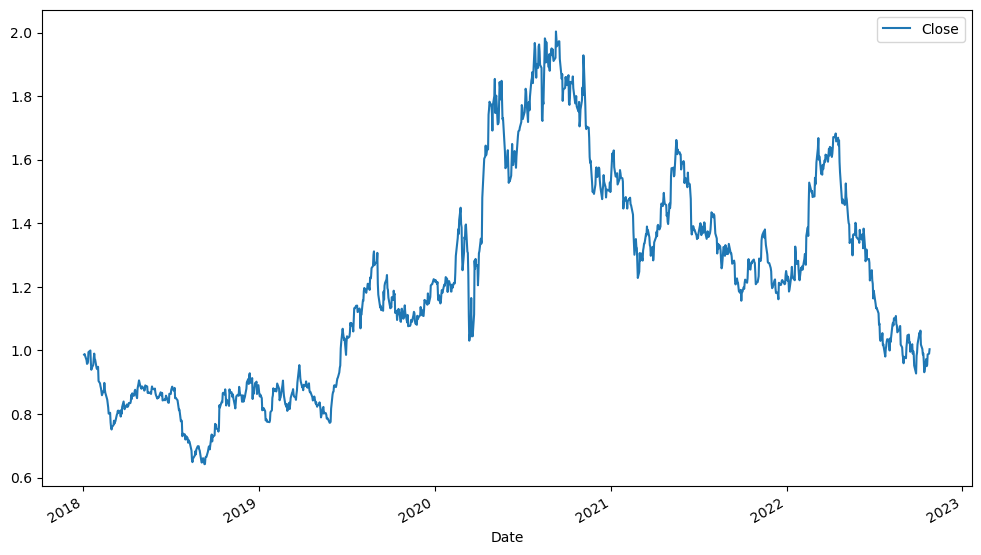

In [14]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))